## Import Libraries

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
#import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
from matplotlib.pyplot import figure
%matplotlib inline
import re
import os
import pandas as pd
import pickle, joblib
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

C:\Users\vikra\anaconda3\envs\myenv\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [2]:

import codecs
import pandas as pd
import requests, zipfile, io
from nltk.corpus import stopwords
#from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
#load the full set of the data
df = pd.read_csv("blogtext.csv",nrows=10000)

In [5]:
df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take me home with you forever where I ...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warn...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",For being so kind to me when I need yo...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds as people mingle...


In [6]:
df.shape

(10000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [8]:
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [9]:
df['age'].describe()

count    10000.000000
mean        28.019300
std          8.123923
min         13.000000
25%         23.000000
50%         27.000000
75%         35.000000
max         46.000000
Name: age, dtype: float64

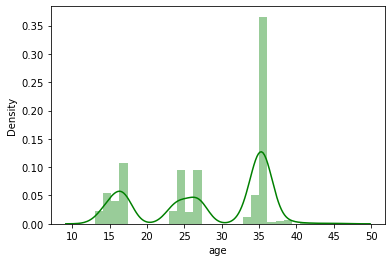

In [10]:
#plt.figure(figsize=(20,6))
#plt.title('Age')
sns.distplot(df['age'],color='green')



Distribution of age is not normal. Mean age is 28 and maximum age is 46. Three peaks can be seen in the distribution.

In [11]:
df.gender.value_counts()

male      5916
female    4084
Name: gender, dtype: int64

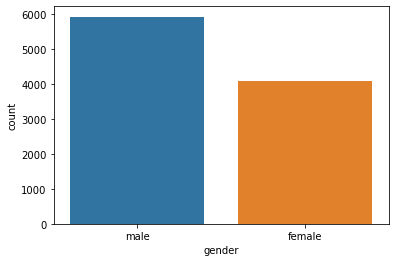

In [12]:
sns.countplot(x='gender',data=df)

No. of males are more than females.

In [13]:
df['sign'].unique()

array(['Leo', 'Aquarius', 'Aries', 'Capricorn', 'Gemini', 'Cancer',
       'Sagittarius', 'Scorpio', 'Libra', 'Virgo', 'Taurus', 'Pisces'],
      dtype=object)

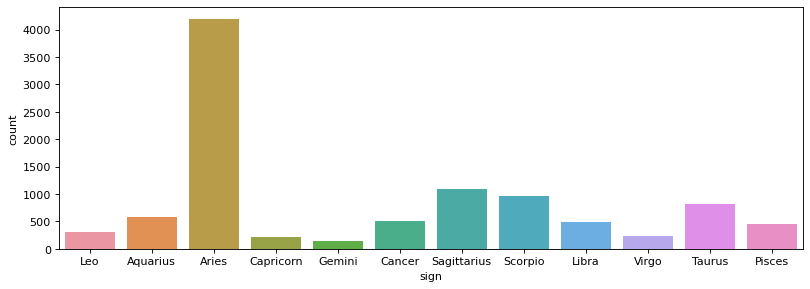

In [14]:
figure(figsize=(12, 4), dpi=80)
sns.countplot(x='sign',data=df)

Aries sign is highest in number.

In [15]:
df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take me home with you forever where I ...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warn...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",For being so kind to me when I need yo...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds as people mingle...


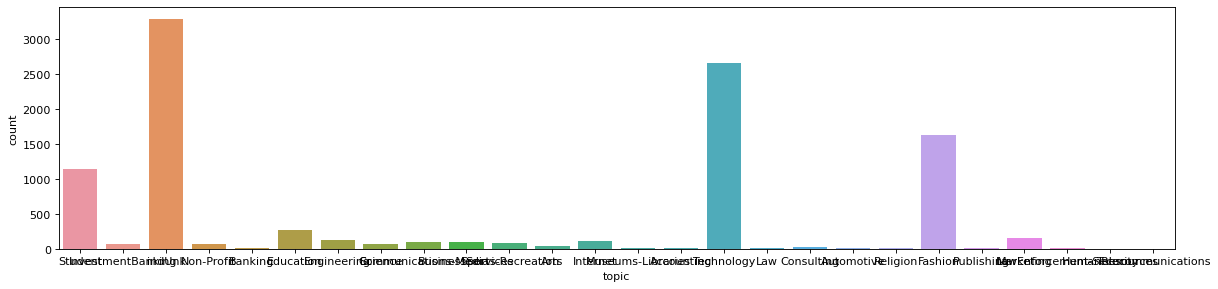

In [16]:
figure(figsize=(18, 4), dpi=80)
#plt.xticks(rotation=45)
#ax.tick_params(axis='x', labelrotation=45)
#plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
sns.countplot(x='topic',data=df)

In [17]:
df['topic'].unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications'], dtype=object)

In [18]:
# drop id and date columns
df.drop(labels=['id','date'], axis=1,inplace=True)

Part A - Q2 A -Eliminate All special Characters and Numbers

In [19]:

df.text = df.text.apply(lambda s : re.sub("[^\w ]","",s))

Part A - Q2 B -Lowercase all textual data

In [20]:
df.text = df.text.apply(lambda s: s.lower())

Part A - Q2 C -Remove all Stopwords

In [21]:
stopwords=set(stopwords.words('english'))
df.text = df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

Part A - Q2 D - Remove all extra white spaces

In [22]:
df.text = df.text.apply(lambda s: s.strip())

Part A - Q3 A -Create dependent and independent variables

Merging all the other columns into labels columns

In [23]:
df['labels'] = df.apply(lambda col : [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [24]:
#drop  gender,age,topic & sign as they are already merged to labels column
df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [25]:
df

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...
9995,take home forever may rest sleep arms forgotte...,"[female, 25, indUnk, Pisces]"
9996,seductive secretness behind doors warning neve...,"[female, 25, indUnk, Pisces]"
9997,kind need holding hand petting hair cry bring ...,"[female, 25, indUnk, Pisces]"
9998,blurry outside sounds people mingle pass darkn...,"[female, 25, indUnk, Pisces]"


Part A - Q3 B -Split data into train and test.

In [26]:
X= df.text
y = df.labels

In [27]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000,)
(8000,)
(2000,)
(2000,)


In [29]:
X_train

8856    someone tell got like sit desk work trying ass...
1545                     expect life change still waiting
8136                urllink look sun reflecting water ahh
7768    like good neighbor id like go detail wedding d...
7782    dufs looking mighty svelte hes got large melon...
                              ...                        
1099    wow thats im saying kids wow love show want go...
2514           fairly inept terminator though wouldnt say
6637    yeah maybe get hands handbook could definitely...
2575    thanks guys support tee hee hee theyre kinds s...
7336    love bb like used love bbhow long sing songpb ...
Name: text, Length: 8000, dtype: object

In [30]:
X_train.shape

(8000,)

Part A - Q3 C - Vectorize data using any one vectorizer.

In [31]:
cvect = CountVectorizer(ngram_range=(1,2))
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

566120

In [32]:
cvect.get_feature_names()

['00',
 '00 one',
 '00 tcr1',
 '000',
 '000 address',
 '000 people',
 '000 sec',
 '000 songs',
 '000 subject',
 '0000001',
 '0000001 zbaras',
 '000001',
 '000001 maybe',
 '001',
 '001 first',
 '002',
 '002 first',
 '002 like',
 '002 middle',
 '003',
 '003 last',
 '004',
 '004 nicknames',
 '005',
 '005 gender',
 '006',
 '006 age',
 '007',
 '007 birthday',
 '007 game',
 '007 jersey',
 '008',
 '008 height',
 '009',
 '009 hair',
 '01',
 '01 2003',
 '01 bette',
 '01 informs',
 '01 known',
 '01 means',
 '01 minds',
 '01 role',
 '01 televive',
 '01 underworld',
 '010',
 '010 eye',
 '0100',
 '0100 hrs',
 '0100 wokeup',
 '0100010001101111011100100110101101111000',
 '011',
 '011 race',
 '011 uich',
 '012',
 '012 glasses',
 '012 last',
 '01234',
 '01234 time',
 '013',
 '013 dodid',
 '013 give',
 '014',
 '014 hair',
 '015',
 '015 born',
 '016',
 '016 current',
 '017',
 '017 zodiac',
 '018',
 '018 many',
 '019',
 '019 nationality',
 '02',
 '02 2002',
 '02 added',
 '02 argue',
 '02 britney',
 '02 de

In [33]:
X_train_ct = cvect.transform(X_train)

In [34]:
X_train_ct

<8000x566120 sparse matrix of type '<class 'numpy.int64'>'
	with 1193481 stored elements in Compressed Sparse Row format>

In [35]:
X_train_ct.shape

(8000, 566120)

In [36]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [37]:
X_test_ct = cvect.transform(X_test)

In [38]:
cvect.get_feature_names()[:10]

['00',
 '00 one',
 '00 tcr1',
 '000',
 '000 address',
 '000 people',
 '000 sec',
 '000 songs',
 '000 subject',
 '0000001']

In [39]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            
            label_counts[str(label)]=1

In [40]:
label_counts

{'male': 5916,
 '15': 602,
 'Student': 1137,
 'Leo': 301,
 '33': 136,
 'InvestmentBanking': 70,
 'Aquarius': 571,
 'female': 4084,
 '14': 212,
 'indUnk': 3287,
 'Aries': 4198,
 '25': 386,
 'Capricorn': 215,
 '17': 1185,
 'Gemini': 150,
 '23': 253,
 'Non-Profit': 71,
 'Cancer': 504,
 'Banking': 16,
 '37': 33,
 'Sagittarius': 1097,
 '26': 234,
 '24': 655,
 'Scorpio': 971,
 '27': 1054,
 'Education': 270,
 '45': 16,
 'Engineering': 127,
 'Libra': 491,
 'Science': 63,
 '34': 553,
 '41': 20,
 'Communications-Media': 99,
 'BusinessServices': 91,
 'Sports-Recreation': 80,
 'Virgo': 236,
 'Taurus': 812,
 'Arts': 45,
 'Pisces': 454,
 '44': 3,
 '16': 440,
 'Internet': 118,
 'Museums-Libraries': 17,
 'Accounting': 4,
 '39': 79,
 '35': 2315,
 'Technology': 2654,
 '36': 1708,
 'Law': 11,
 '46': 7,
 'Consulting': 21,
 'Automotive': 14,
 '42': 14,
 'Religion': 9,
 '13': 42,
 'Fashion': 1622,
 '38': 46,
 '43': 6,
 'Publishing': 4,
 '40': 1,
 'Marketing': 156,
 'LawEnforcement-Security': 10,
 'HumanReso

In [41]:
y_train

8856            [female, 17, Student, Sagittarius]
1545                 [male, 35, Technology, Aries]
8136    [female, 25, Communications-Media, Pisces]
7768                    [male, 36, Fashion, Aries]
7782                    [male, 36, Fashion, Aries]
                           ...                    
1099                  [female, 15, Student, Libra]
2514                 [male, 35, Technology, Aries]
6637                    [male, 36, Fashion, Aries]
2575                 [male, 35, Technology, Aries]
7336                    [male, 36, Fashion, Aries]
Name: labels, Length: 8000, dtype: object

7. Transform the labels
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [42]:
df

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...
9995,take home forever may rest sleep arms forgotte...,"[female, 25, indUnk, Pisces]"
9996,seductive secretness behind doors warning neve...,"[female, 25, indUnk, Pisces]"
9997,kind need holding hand petting hair cry bring ...,"[female, 25, indUnk, Pisces]"
9998,blurry outside sounds people mingle pass darkn...,"[female, 25, indUnk, Pisces]"


In [43]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [44]:
#from sklearn.preprocessing import MultiLabelBinarizer
#mlb = MultiLabelBinarizer()
#mlb.fit_transform([(1, 2), (3,)])

array([[1, 1, 0],
       [0, 0, 1]])

In [45]:
#mlb.fit_transform([{'sci-fi', 'thriller'}, {'comedy'}])

array([[0, 1, 1],
       [1, 0, 0]])

In [46]:
y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [47]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [48]:
print(y_train.shape)
print(X_train.shape)

(8000, 64)
(8000,)


In [49]:
print(X_test_ct.shape)
print(X_train_ct.shape)

(2000, 566120)
(8000, 566120)


Part A - Q3 D - Build a base model for Supervised Learning - Classification.

In [50]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [52]:
pred=model.predict(X_test_ct)

In [53]:
pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])


Part A - Q3 E - Clearly print Performance Metrics.

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_test,pred):
    print('Accuracy score: ', accuracy_score(y_test,pred))
    print('F1 score: ', f1_score(y_test,pred, average='micro'))
    print('Average precision score: ', average_precision_score(y_test,pred, average='micro'))
    print('Average recall score: ', recall_score(y_test,pred, average='micro'))

In [55]:
print_evaluation_scores(y_test,pred)

Accuracy score:  0.317
F1 score:  0.6310357537781054
Average precision score:  0.44052701033243485
Average recall score:  0.535


In [56]:
model=='svm'
model = LinearSVC()#C=C, penalty='l1', dual=False, loss='squared_hinge')
model = OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)
pred=model.predict(X_test_ct)  

In [57]:
print_evaluation_scores(y_test,pred)

Accuracy score:  0.277
F1 score:  0.5990886785839468
Average precision score:  0.3934134564545092
Average recall score:  0.534125


Logistic Regression is performing better than SVC.


Part A - Q4 A - Experiment with other vectorisers.

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [59]:
X_train

8856    someone tell got like sit desk work trying ass...
1545                     expect life change still waiting
8136                urllink look sun reflecting water ahh
7768    like good neighbor id like go detail wedding d...
7782    dufs looking mighty svelte hes got large melon...
                              ...                        
1099    wow thats im saying kids wow love show want go...
2514           fairly inept terminator though wouldnt say
6637    yeah maybe get hands handbook could definitely...
2575    thanks guys support tee hee hee theyre kinds s...
7336    love bb like used love bbhow long sing songpb ...
Name: text, Length: 8000, dtype: object

In [60]:
tfvect = TfidfVectorizer()
#Feed SMS data to CountVectorizer
tfvect.fit(X_train)

#Check the vocablury size
len(tfvect.vocabulary_)

59804

In [61]:
tfvect.get_feature_names()

['00',
 '000',
 '0000001',
 '000001',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '01',
 '010',
 '0100',
 '0100010001101111011100100110101101111000',
 '011',
 '012',
 '01234',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '02',
 '020',
 '021',
 '02182004',
 '022',
 '02232004',
 '023',
 '024',
 '025',
 '025613',
 '026',
 '027',
 '028',
 '029',
 '03',
 '030',
 '0303',
 '030303',
 '0303030303',
 '031',
 '03152004',
 '032',
 '033',
 '033100',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '03my',
 '04',
 '040',
 '041',
 '042',
 '043',
 '0430',
 '044',
 '045',
 '045090',
 '046',
 '047',
 '048',
 '049',
 '04but',
 '04yet',
 '05',
 '050',
 '051',
 '051304',
 '051704',
 '052',
 '0525',
 '05292004',
 '053',
 '0530',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '06',
 '060',
 '0600',
 '060404',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '06th',
 '07',
 '070',
 '0700',
 '07072004',
 '071',
 '072',
 '07262004',
 '073',
 '0

In [62]:
X_train_tf = tfvect.transform(X_train)

In [63]:
type(X_train_tf)

scipy.sparse.csr.csr_matrix

In [64]:
X_test_tf = tfvect.transform(X_test)

In [65]:
tfvect.get_feature_names()[:10]

['00', '000', '0000001', '000001', '001', '002', '003', '004', '005', '006']

In [66]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [67]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_tf,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [68]:
pred=model.predict(X_test_tf)

In [69]:
pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [70]:
print_evaluation_scores(y_test,pred)

Accuracy score:  0.1525
F1 score:  0.5343959731543624
Average precision score:  0.36109375
Average recall score:  0.398125


In [71]:
model=='svm'
model = LinearSVC()#C=C, penalty='l1', dual=False, loss='squared_hinge')
model = OneVsRestClassifier(model)
model.fit(X_train_tf,y_train)
pred=model.predict(X_test_tf)  

In [72]:
print_evaluation_scores(y_test,pred)

Accuracy score:  0.334
F1 score:  0.6573405759357095
Average precision score:  0.47637169200450447
Average recall score:  0.552125


tfidf is performing better than count vectorizer

Part A - Q4 C - Tune Parameters/Hyperparameters of the model/s.

Part A - Q4 D - Clearly print Performance Metrics.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
tuned_parameters = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]


# Find Optimal C by grid search 

log_reg_clf = OneVsRestClassifier(LogisticRegression())

logistic_gs = GridSearchCV(log_reg_clf, tuned_parameters,scoring = 'f1_micro', cv=3)

logistic_gs.fit(X_train_tf, y_train)
print(logistic_gs.best_estimator_)

OneVsRestClassifier(estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)


In [74]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)
model.fit(X_train_tf,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [75]:
pred=model.predict(X_test_tf)

In [76]:
pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [77]:
print_evaluation_scores(y_test,pred)

Accuracy score:  0.3235
F1 score:  0.655068633927916
Average precision score:  0.4702300790280989
Average recall score:  0.55775


In [80]:

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

model_to_set = OneVsRestClassifier(SVC(kernel="poly"))

parameters = {
    "estimator__C": [1,2,4,8],
    "estimator__kernel": ["poly","rbf"],
    "estimator__degree":[1, 2, 3, 4],
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters,scoring = 'f1_micro', cv=3)

model_tunning.fit(X_train_tf, y_train)

print(model_tunning.best_score_)

0.23610000000000003


In [81]:
print(model_tunning.best_estimator_)

OneVsRestClassifier(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)


In [89]:
model=='svm'
#model = LinearSVC()#C=C, penalty='l1', dual=False, loss='squared_hinge')
model = OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)
model.fit(X_train_tf,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [90]:
pred=model.predict(X_test_tf)  

In [91]:
print_evaluation_scores(y_test,pred)

Accuracy score:  0.334
F1 score:  0.6573405759357095
Average precision score:  0.47637169200450447
Average recall score:  0.552125



Part A - Q5 A - Which vectorizer performed better? Probable reason?.

Part A - Q5 B - Which model outperformed? Probable reason?

Part A - Q5 C - Which parameter/hyperparameter significantly helped to improve performance? Probable reason?.

Part A - Q5 D - According to you, which performance metric should be given most importance, why?.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

SVM and logistic regression are performing comparable. Both are having similar performance .


Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.
So, F1-score is a better metric to evaluate our model on.


The parameter C is most important as it is the inverse of regularization strength in Logistic Regression.
It is a penalty term which controls Overfitting.

C is the most important hypermeter which is set before the training model and  used to control error.

Print the true vs predicted labels for any 5 entries from the datase

In [103]:
print(binarizer.inverse_transform(pred)[200])
print(binarizer.inverse_transform(y_test)[200])

('35', 'Aries', 'Technology', 'male')
('35', 'Aries', 'Technology', 'male')


In [104]:
print(binarizer.inverse_transform(pred)[300])
print(binarizer.inverse_transform(y_test)[300])

('Aries', 'male')
('27', 'Pisces', 'Technology', 'male')


In [106]:
print(binarizer.inverse_transform(pred)[400])
print(binarizer.inverse_transform(y_test)[400])

('36', 'Aries', 'Fashion', 'male')
('36', 'Aries', 'Fashion', 'male')


In [107]:
print(binarizer.inverse_transform(pred)[500])
print(binarizer.inverse_transform(y_test)[500])

('female', 'indUnk')
('35', 'Aries', 'Technology', 'male')


In [108]:
print(binarizer.inverse_transform(pred)[600])
print(binarizer.inverse_transform(y_test)[600])

('35', 'Aries', 'Technology', 'male')
('35', 'Aries', 'Technology', 'male')
